# Lighthouse Indicium

In [2]:
import re
import pandas   as pd
import numpy    as np
import seaborn  as sns

from matplotlib import pyplot as plt

In [5]:
df4 = pd.read_csv('../data/interim/dataset_selected.csv')

## Análise Univariada

In [10]:
num_attributes = df4.select_dtypes(include=['int64', 'float64'])
cat_attributes = df4.select_dtypes(exclude=['int64', 'float64'])

### Response Variable

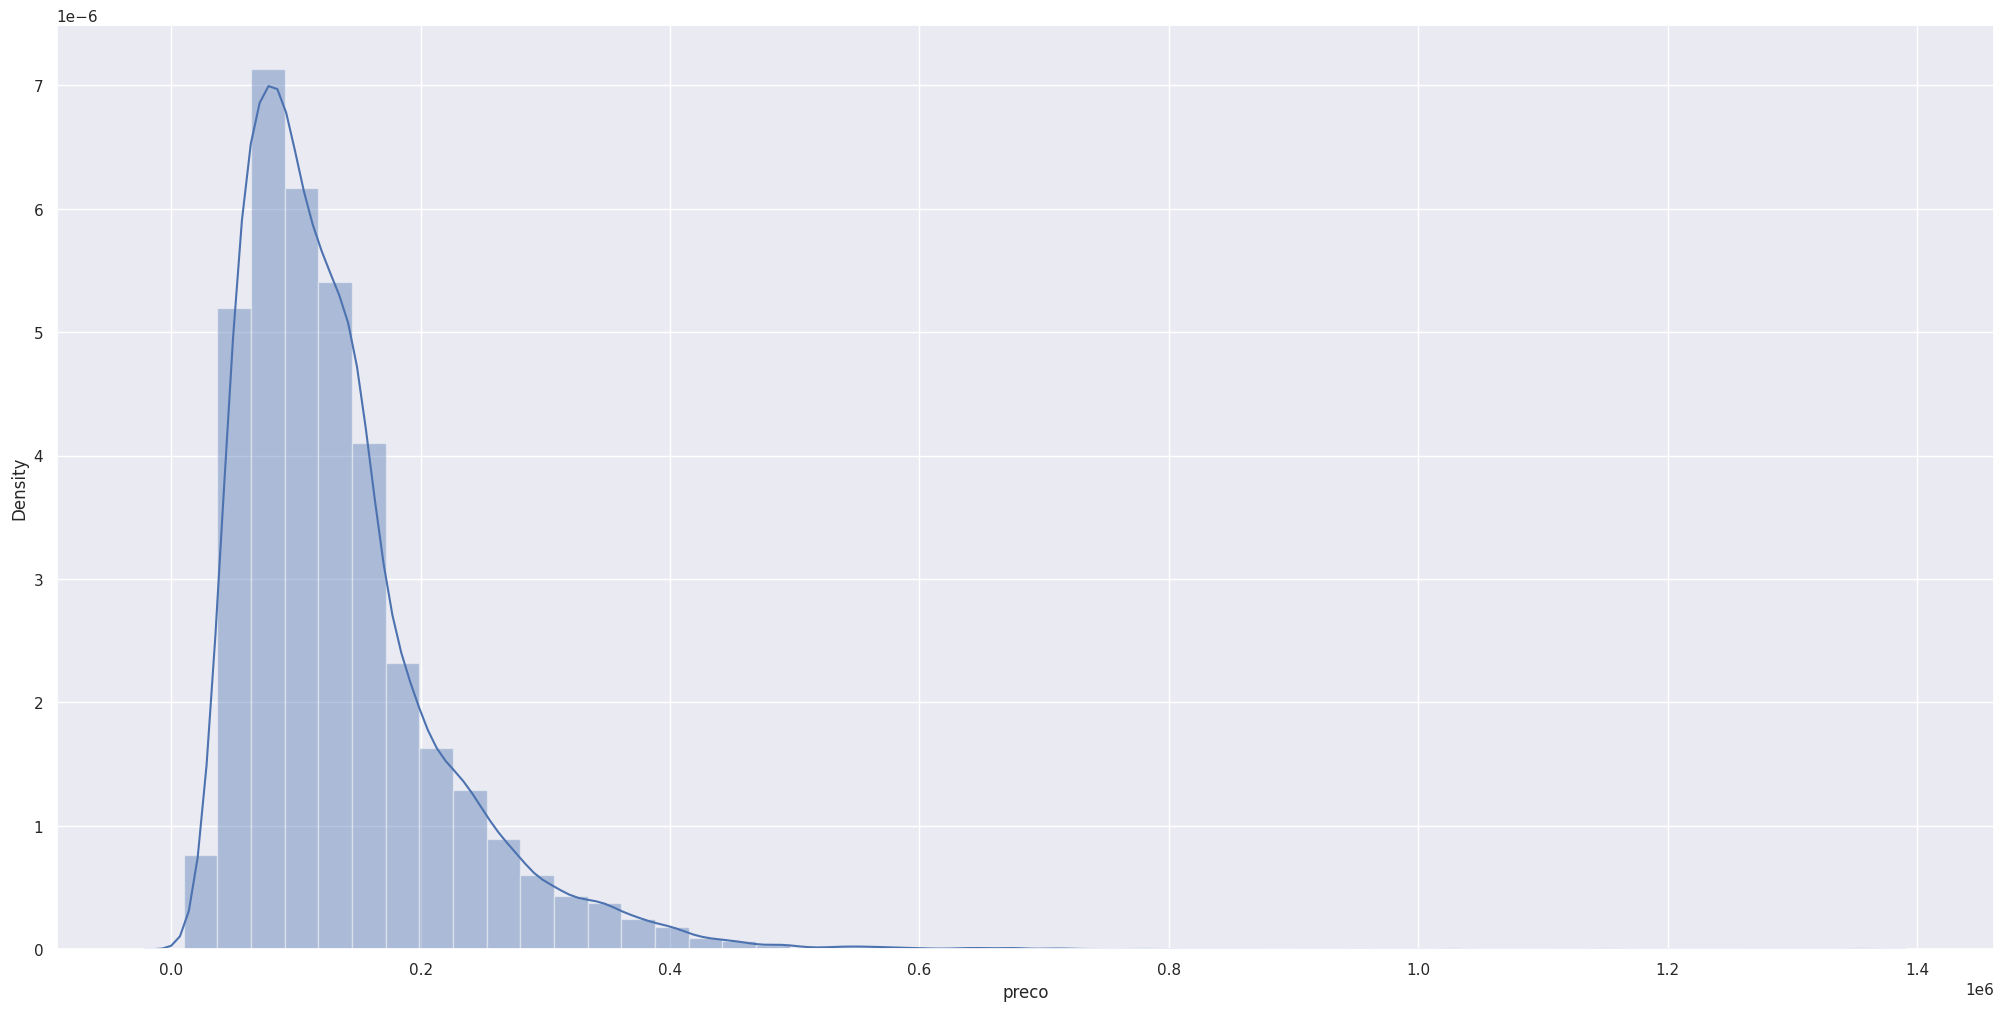

In [49]:
sns.distplot(df4['preco']);

### Numerical Variable

In [191]:
descriptive_analysis(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,num_fotos,0.0000,21.0000,21.0000,10.2621,8.0000,3.5668,0.8371,-0.3903
1,ano_fabricacao,1985.0000,2022.0000,37.0000,2016.7586,2018.0000,4.0624,-2.4938,9.1891
2,ano_modelo,1997.0000,2023.0000,26.0000,2017.8090,2018.0000,2.6739,-0.4986,-0.5225
3,hodometro,100.0000,390065.0000,389965.0000,58430.5921,57434.0000,32561.2190,0.5909,1.1946
4,num_portas,2.0000,4.0000,2.0000,3.9407,4.0000,0.3384,-5.5450,28.7976
5,preco,9869.9506,1359812.8923,1349942.9417,133023.8799,114355.7970,81661.4920,2.1490,10.9749


Para as features númericas foram calculados os valores mínimos, máximos, range, média, mediana, desvio padrão, assimetria (skewness) e curtose (kurtosis).

* Mínimo, Máximo, Range: esses três valores permitem observarmos a presença de outliers quando comparados a média e mediana.
* Média: valor médio de cada feature, por ser influenciada pelos outliers, é comparada a mediana
* Mediana: valor central de cada feature, como não é influenciada por outliers, serve como norte para entendermos o comportamento da feature comparando com a média
* Desvio padrão: um desvio padrão grande significa que os valores estão bem distribuídos em torno da média, quanto maior o desvio padrão menos homogênea a feature
* Assimetria: mede o afastamento da distribuição ao eixo de simetria, indica a relação da média e mediana com valores negativos ou positivos
* Curtose: grau de achatamento da curva, valores positivos indicam caudas mais pesadas do que a distribuição normal

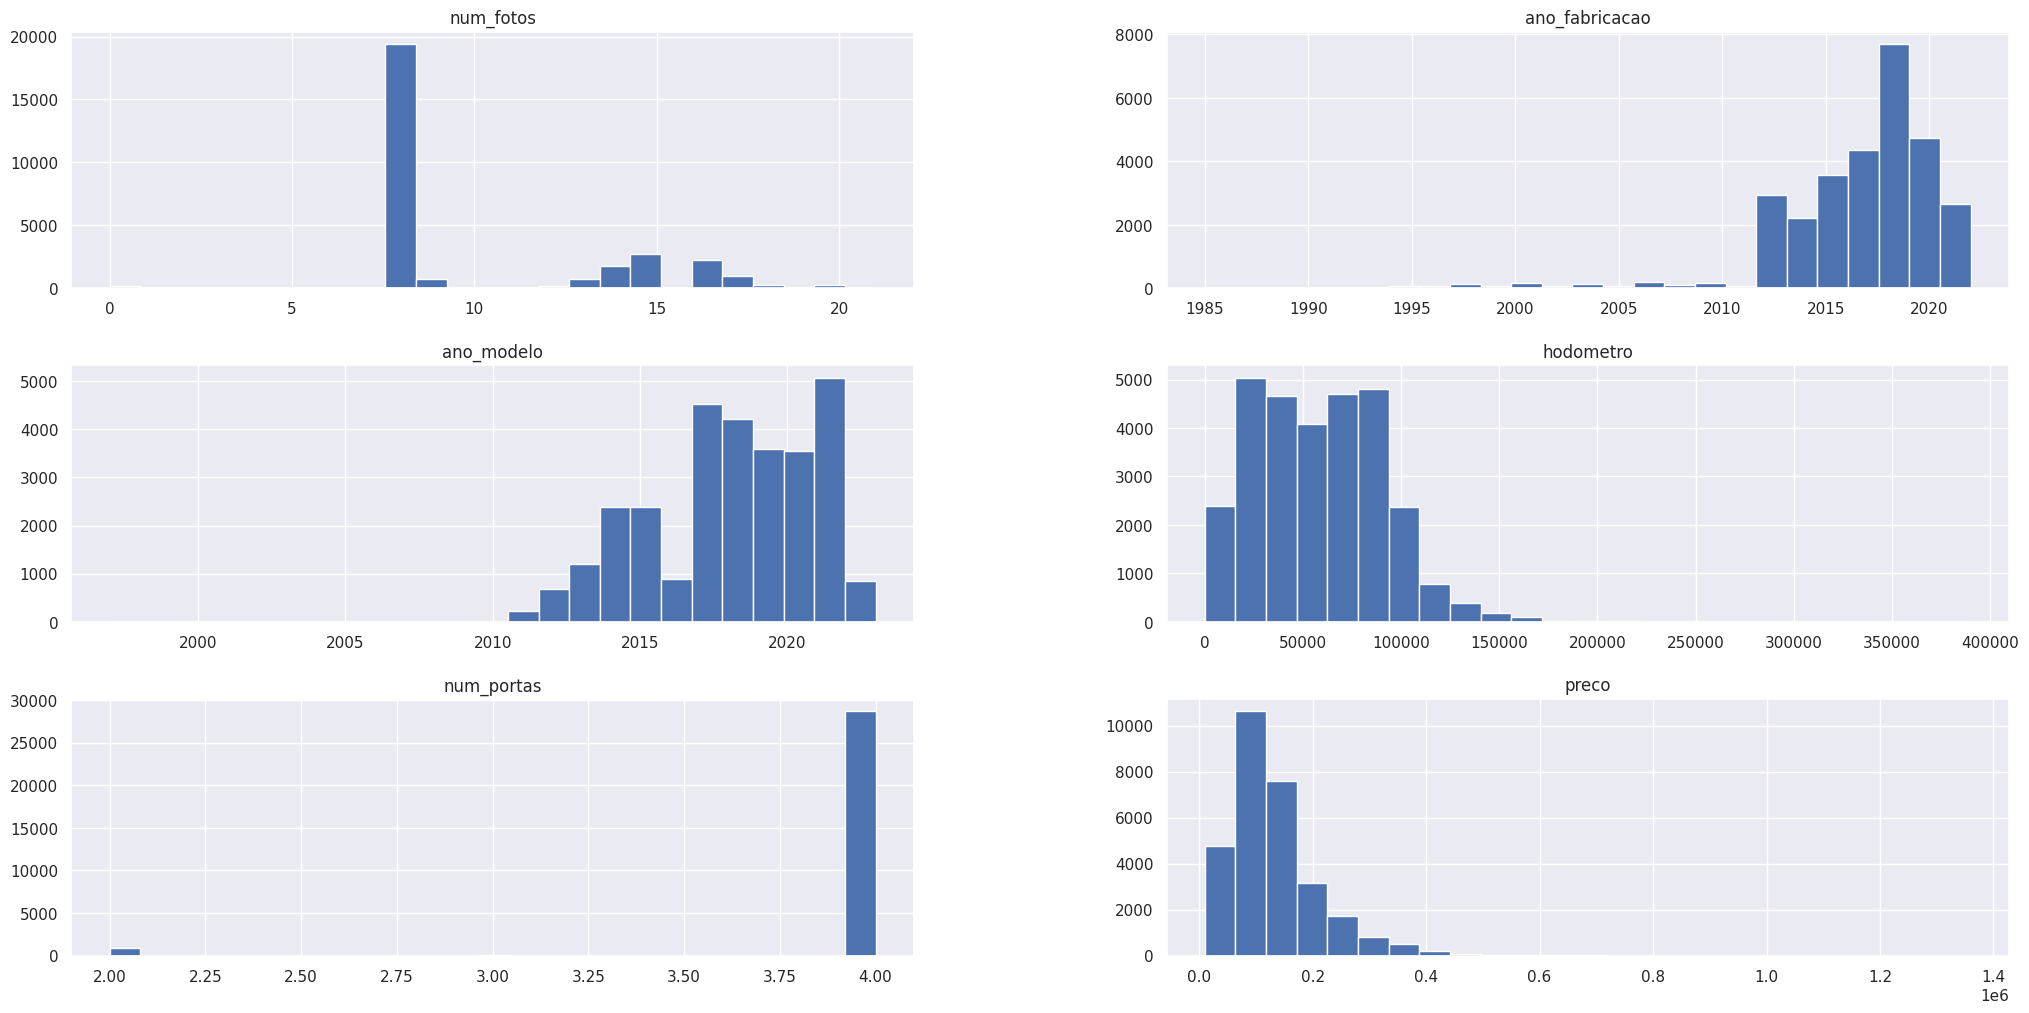

In [192]:
num_attributes.hist(bins=25);

### 4.1.3 Categorical Variable

#### Marca

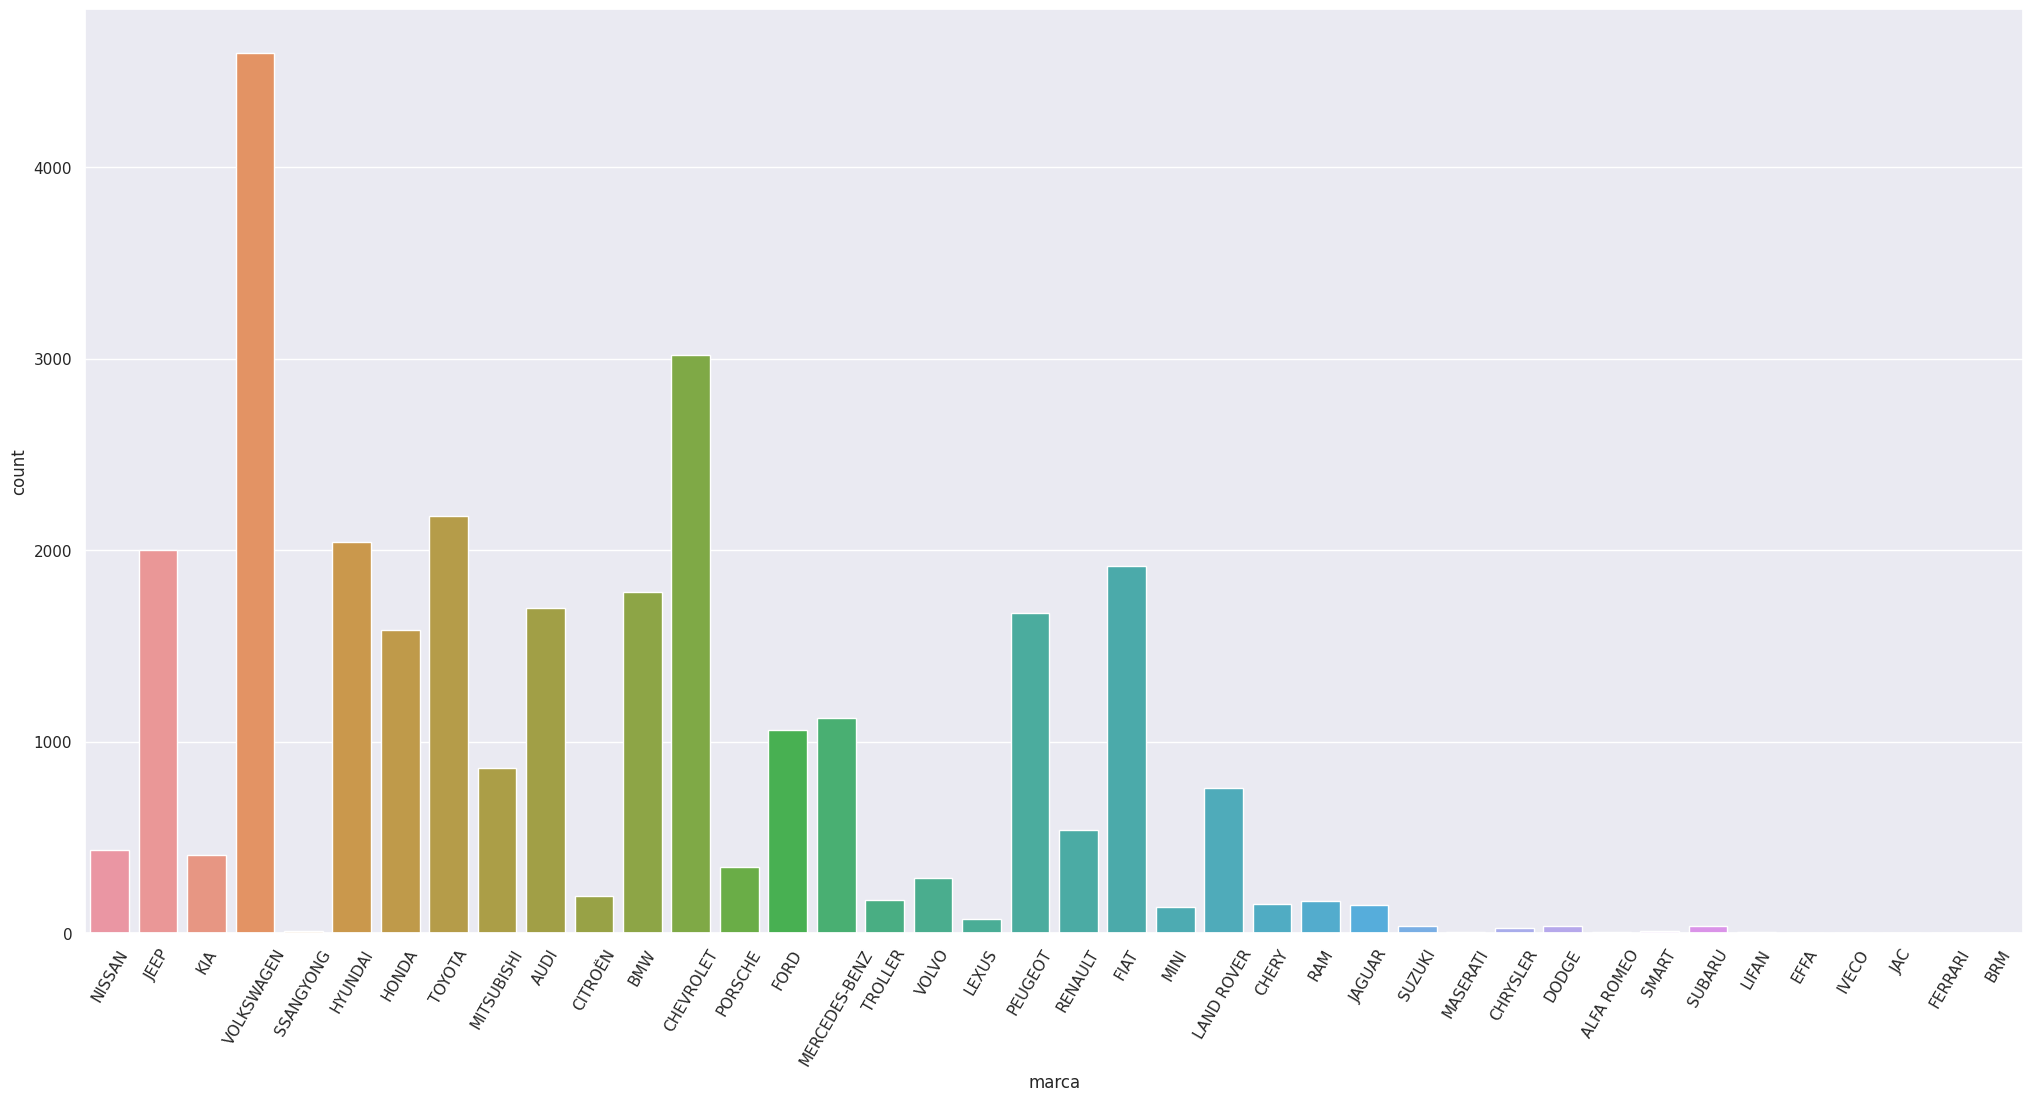

In [194]:
sns.countplot(x=df4['marca'])
plt.xticks(rotation=60);

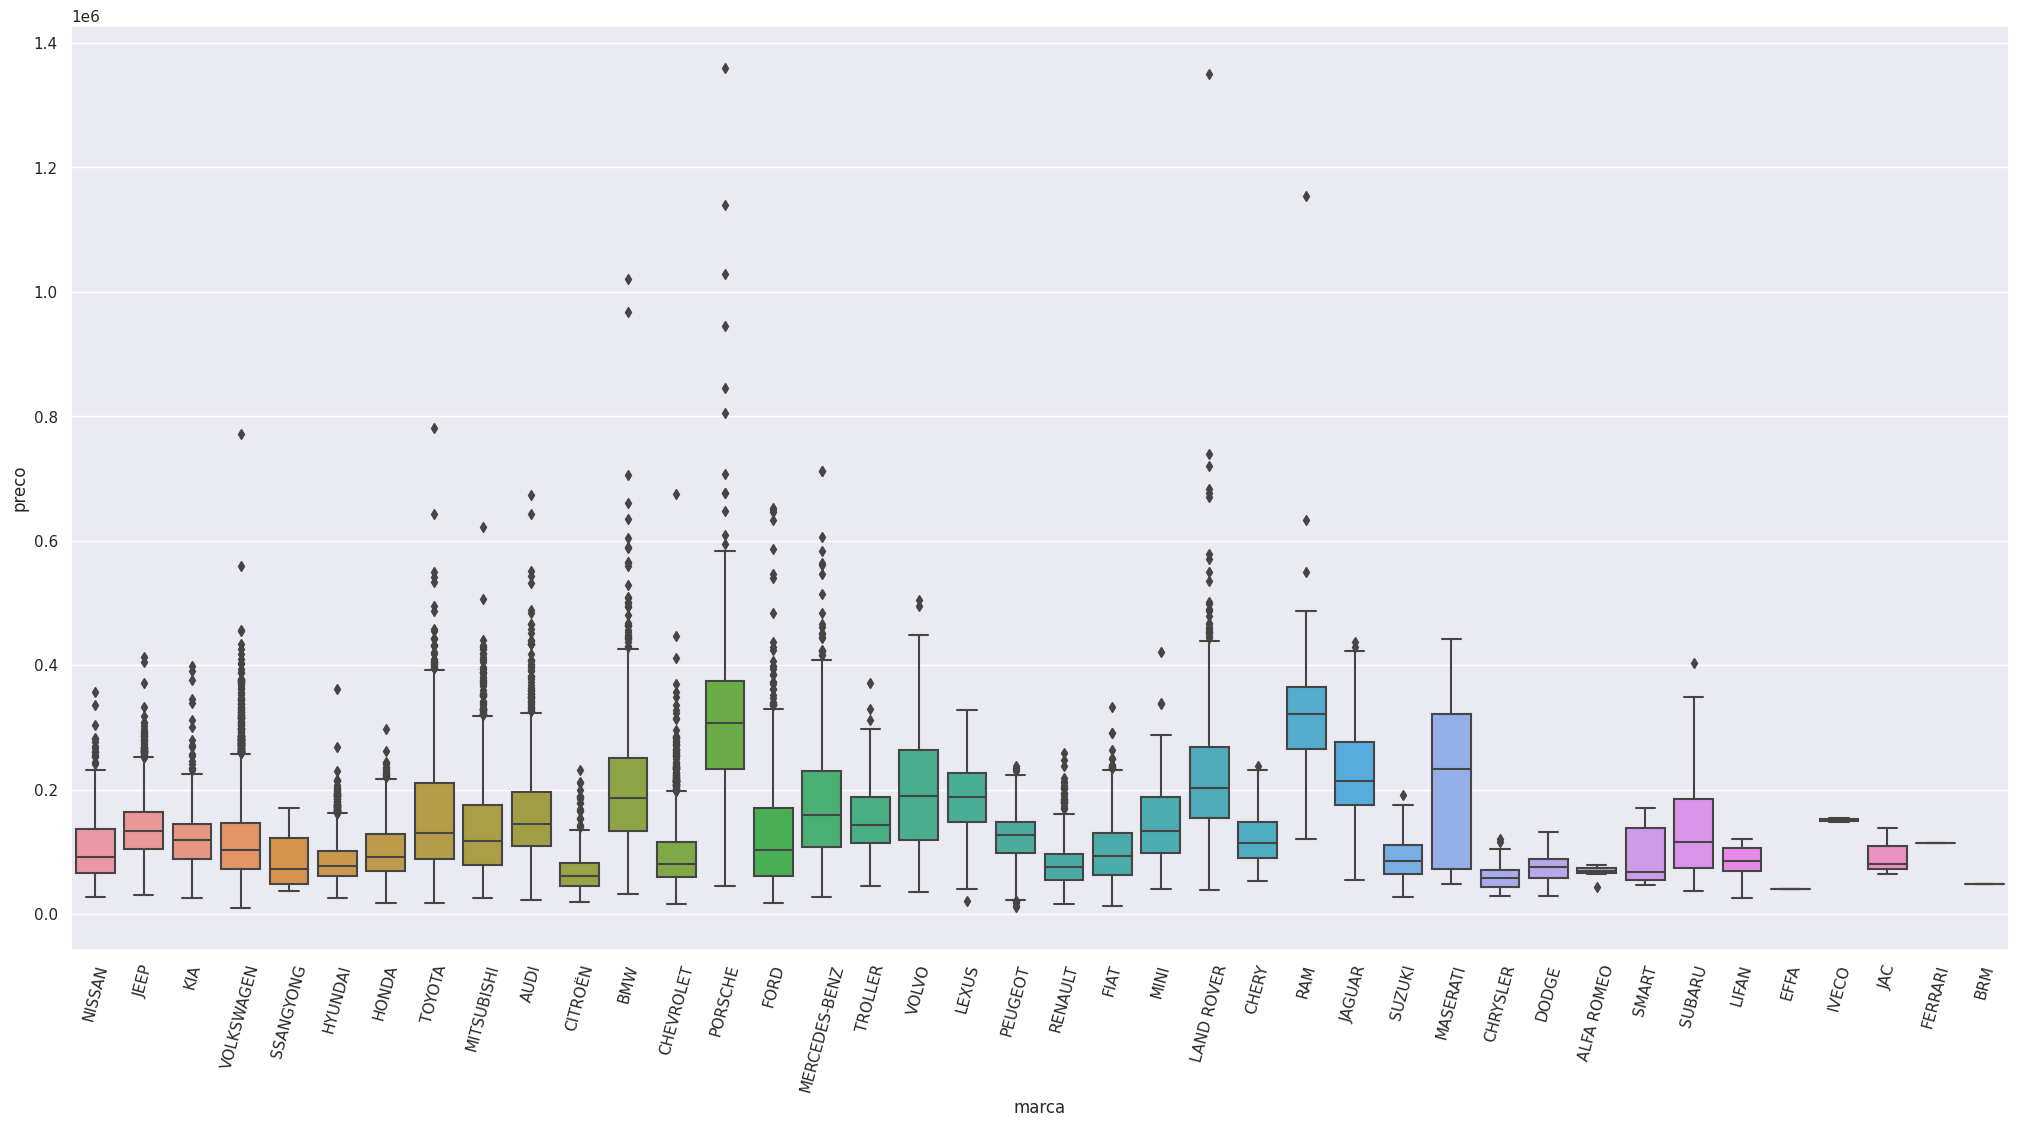

In [16]:
sns.boxplot(x='marca', y='preco', data=df4)
plt.xticks(rotation=75);

#### Cambio

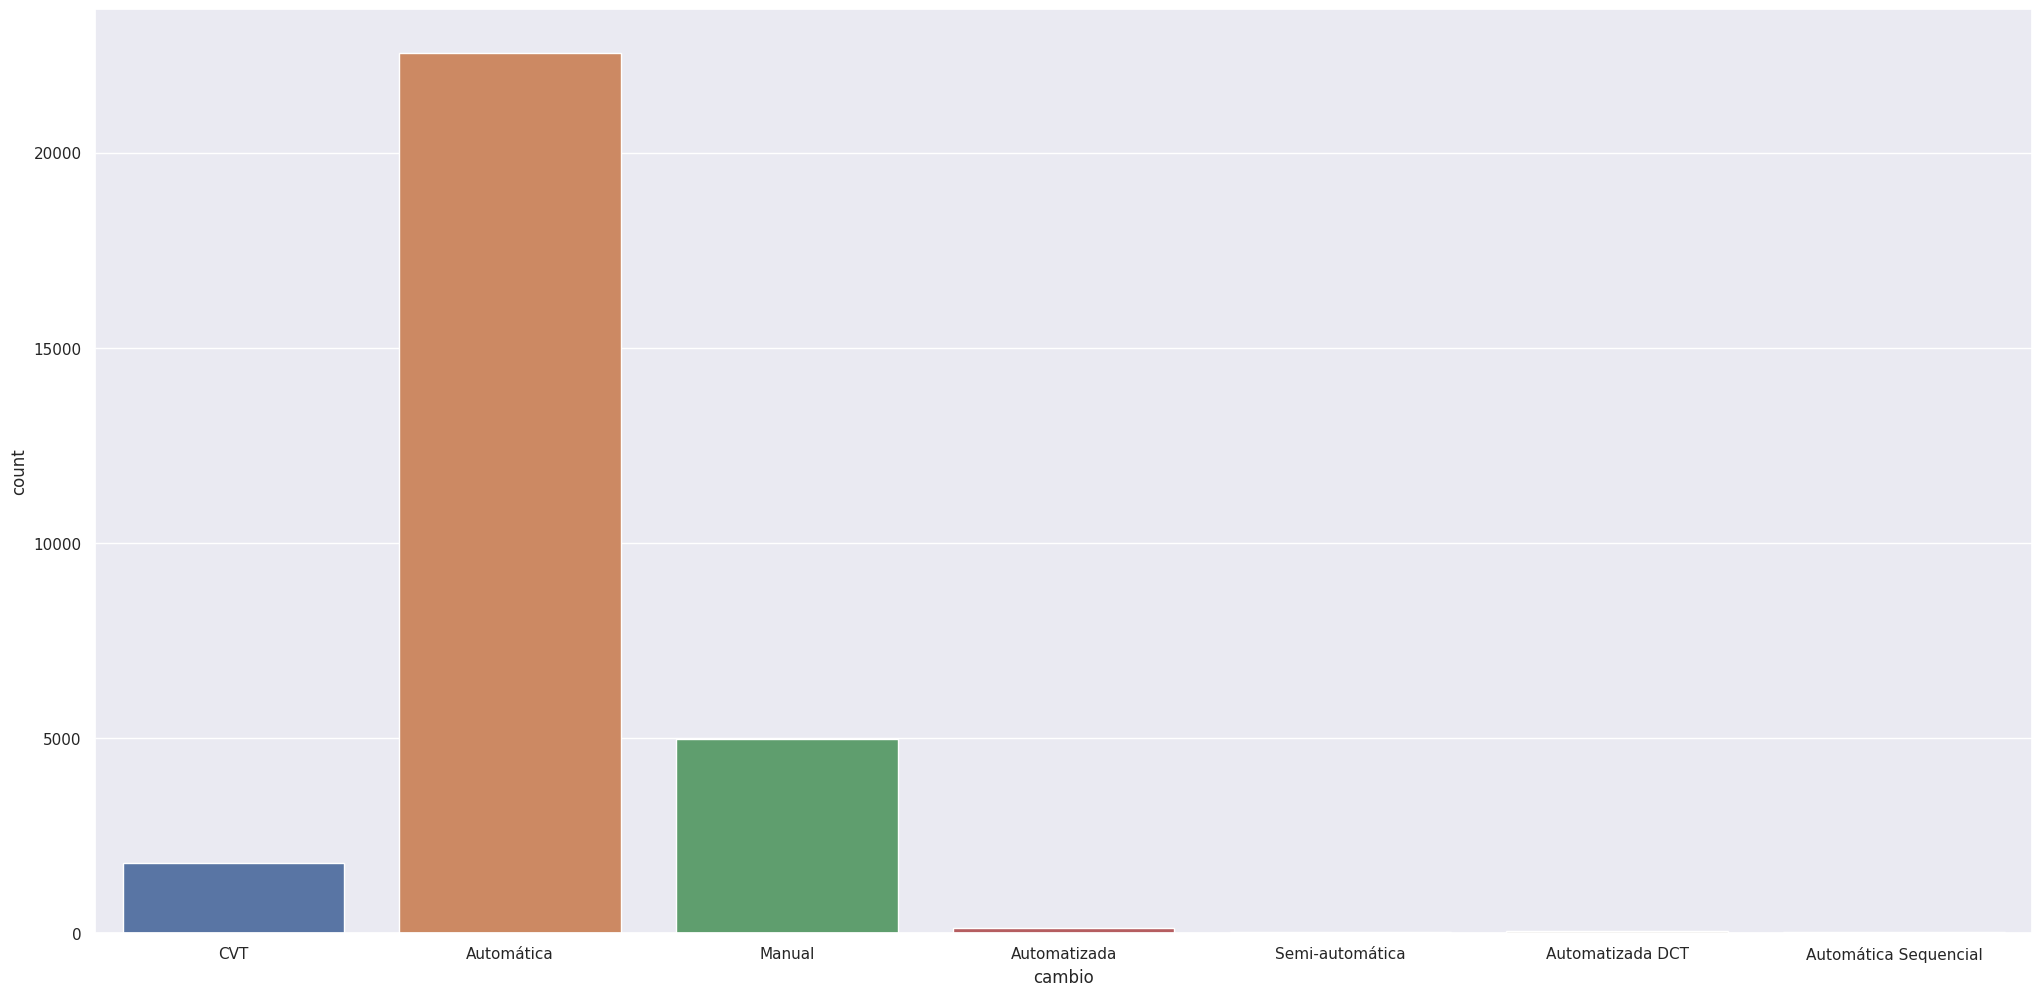

In [50]:
sns.countplot(x=df4['cambio']);

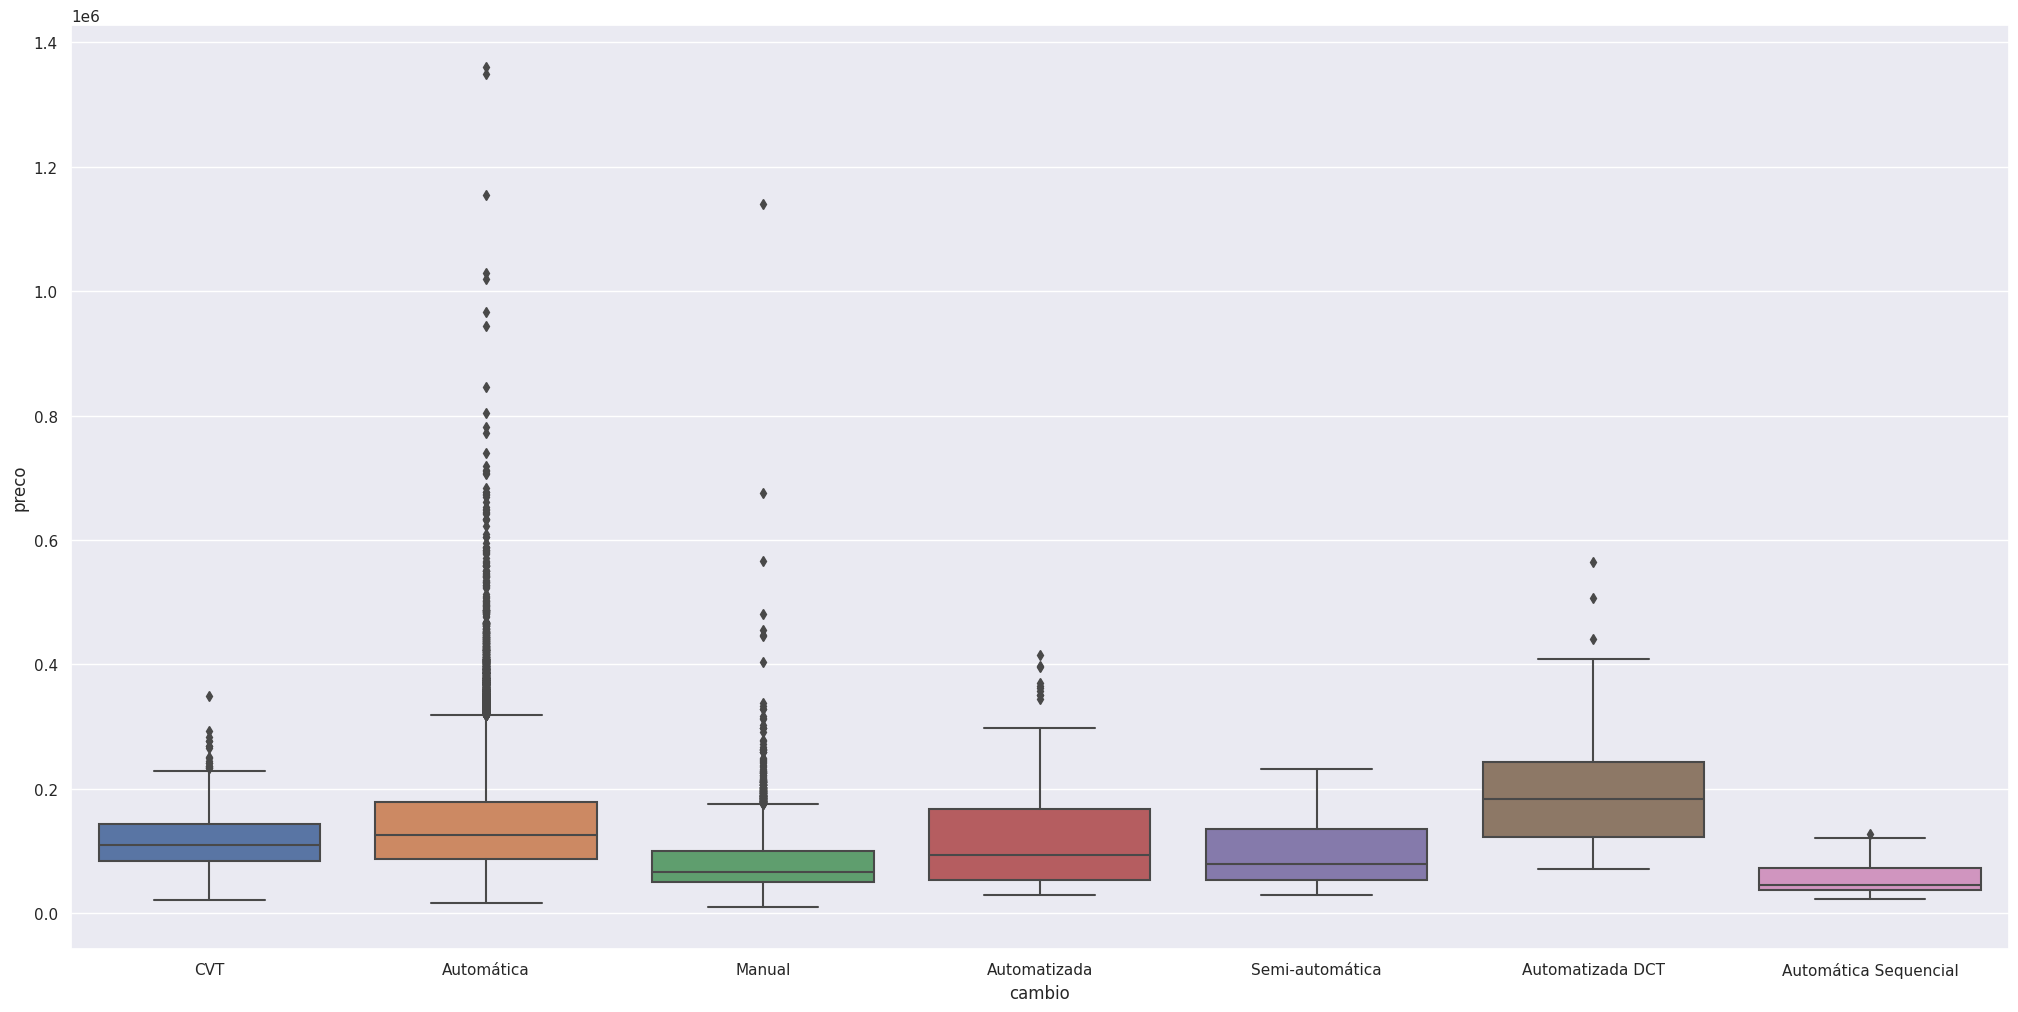

In [24]:
sns.boxplot(x='cambio', y='preco', data=df4);

#### Estado

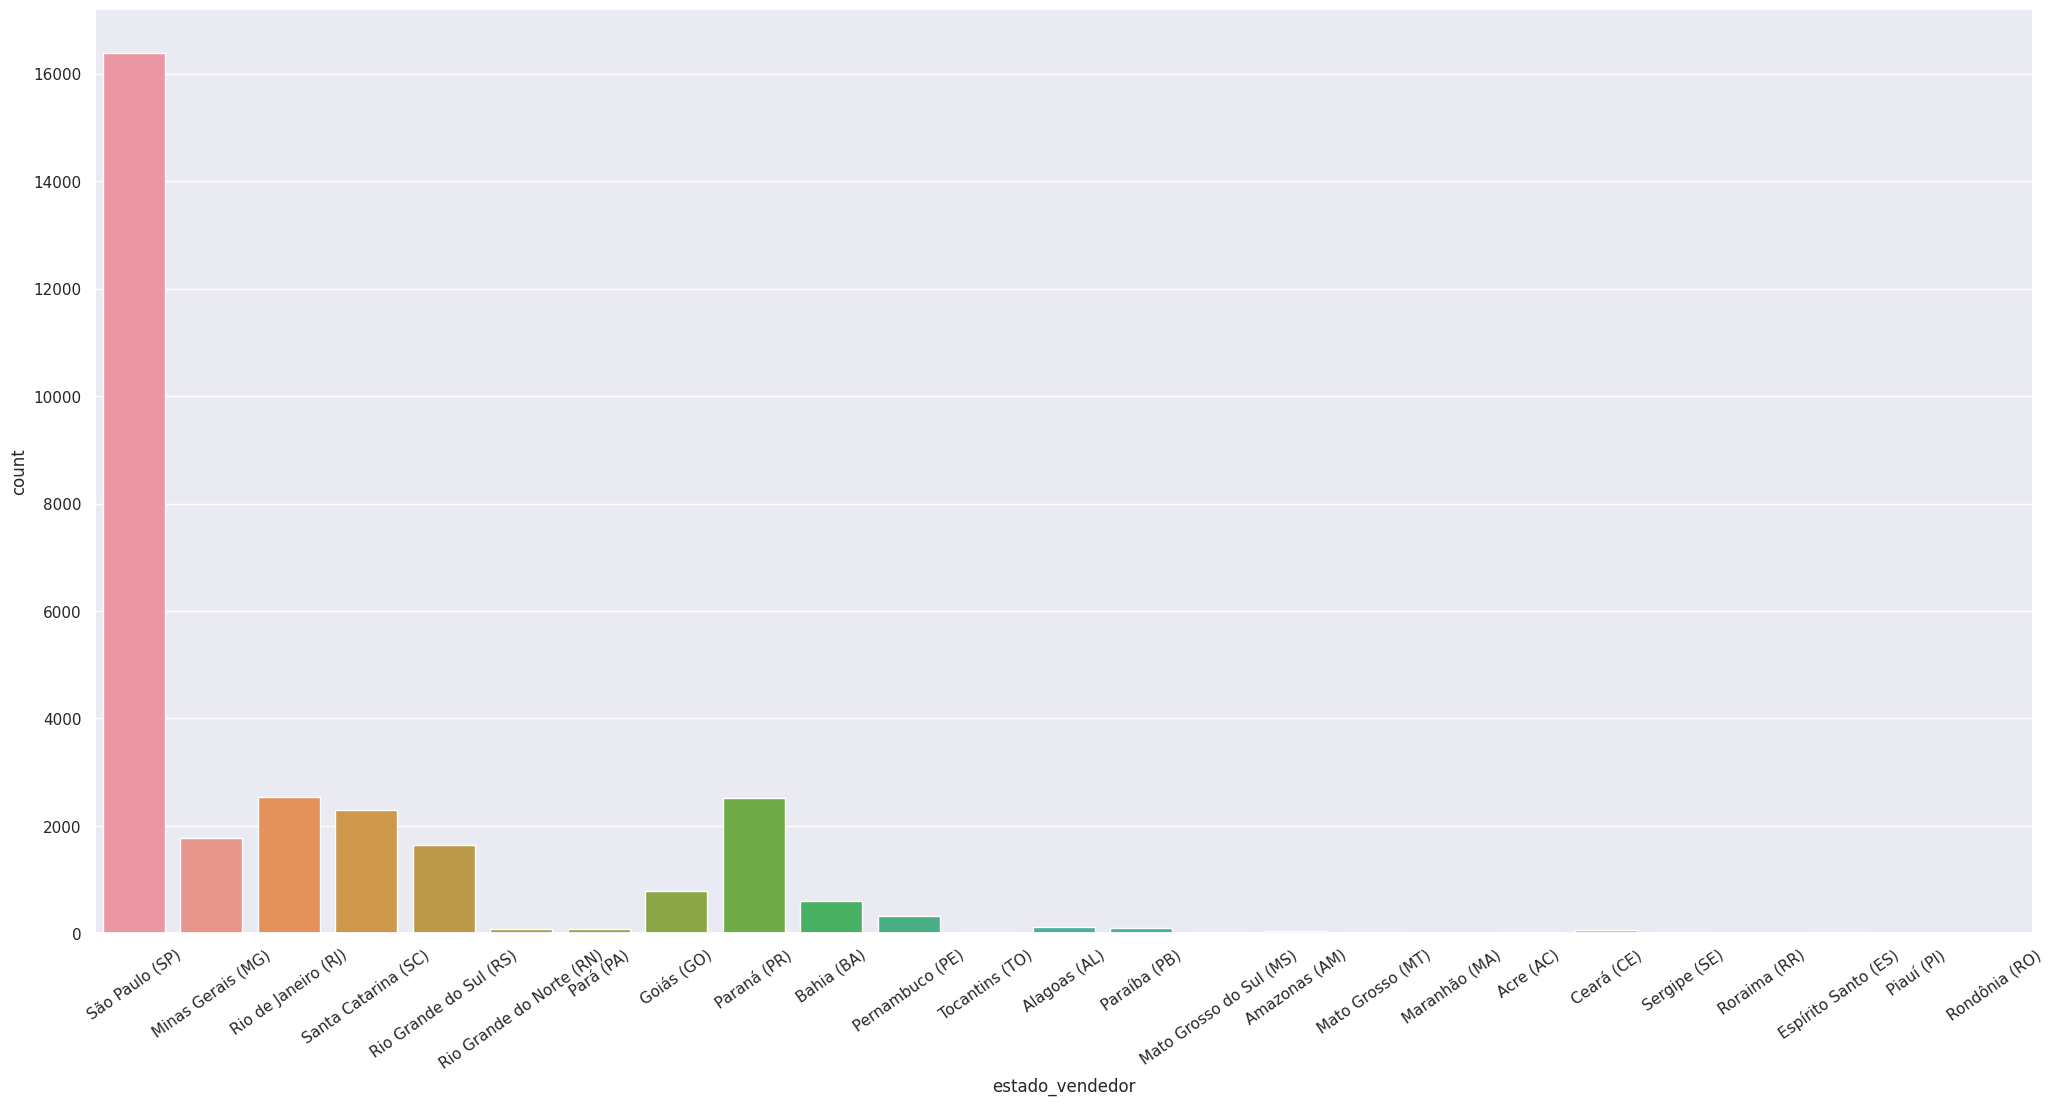

In [236]:
sns.countplot(x=df4['estado_vendedor'])
plt.xticks(rotation=35);

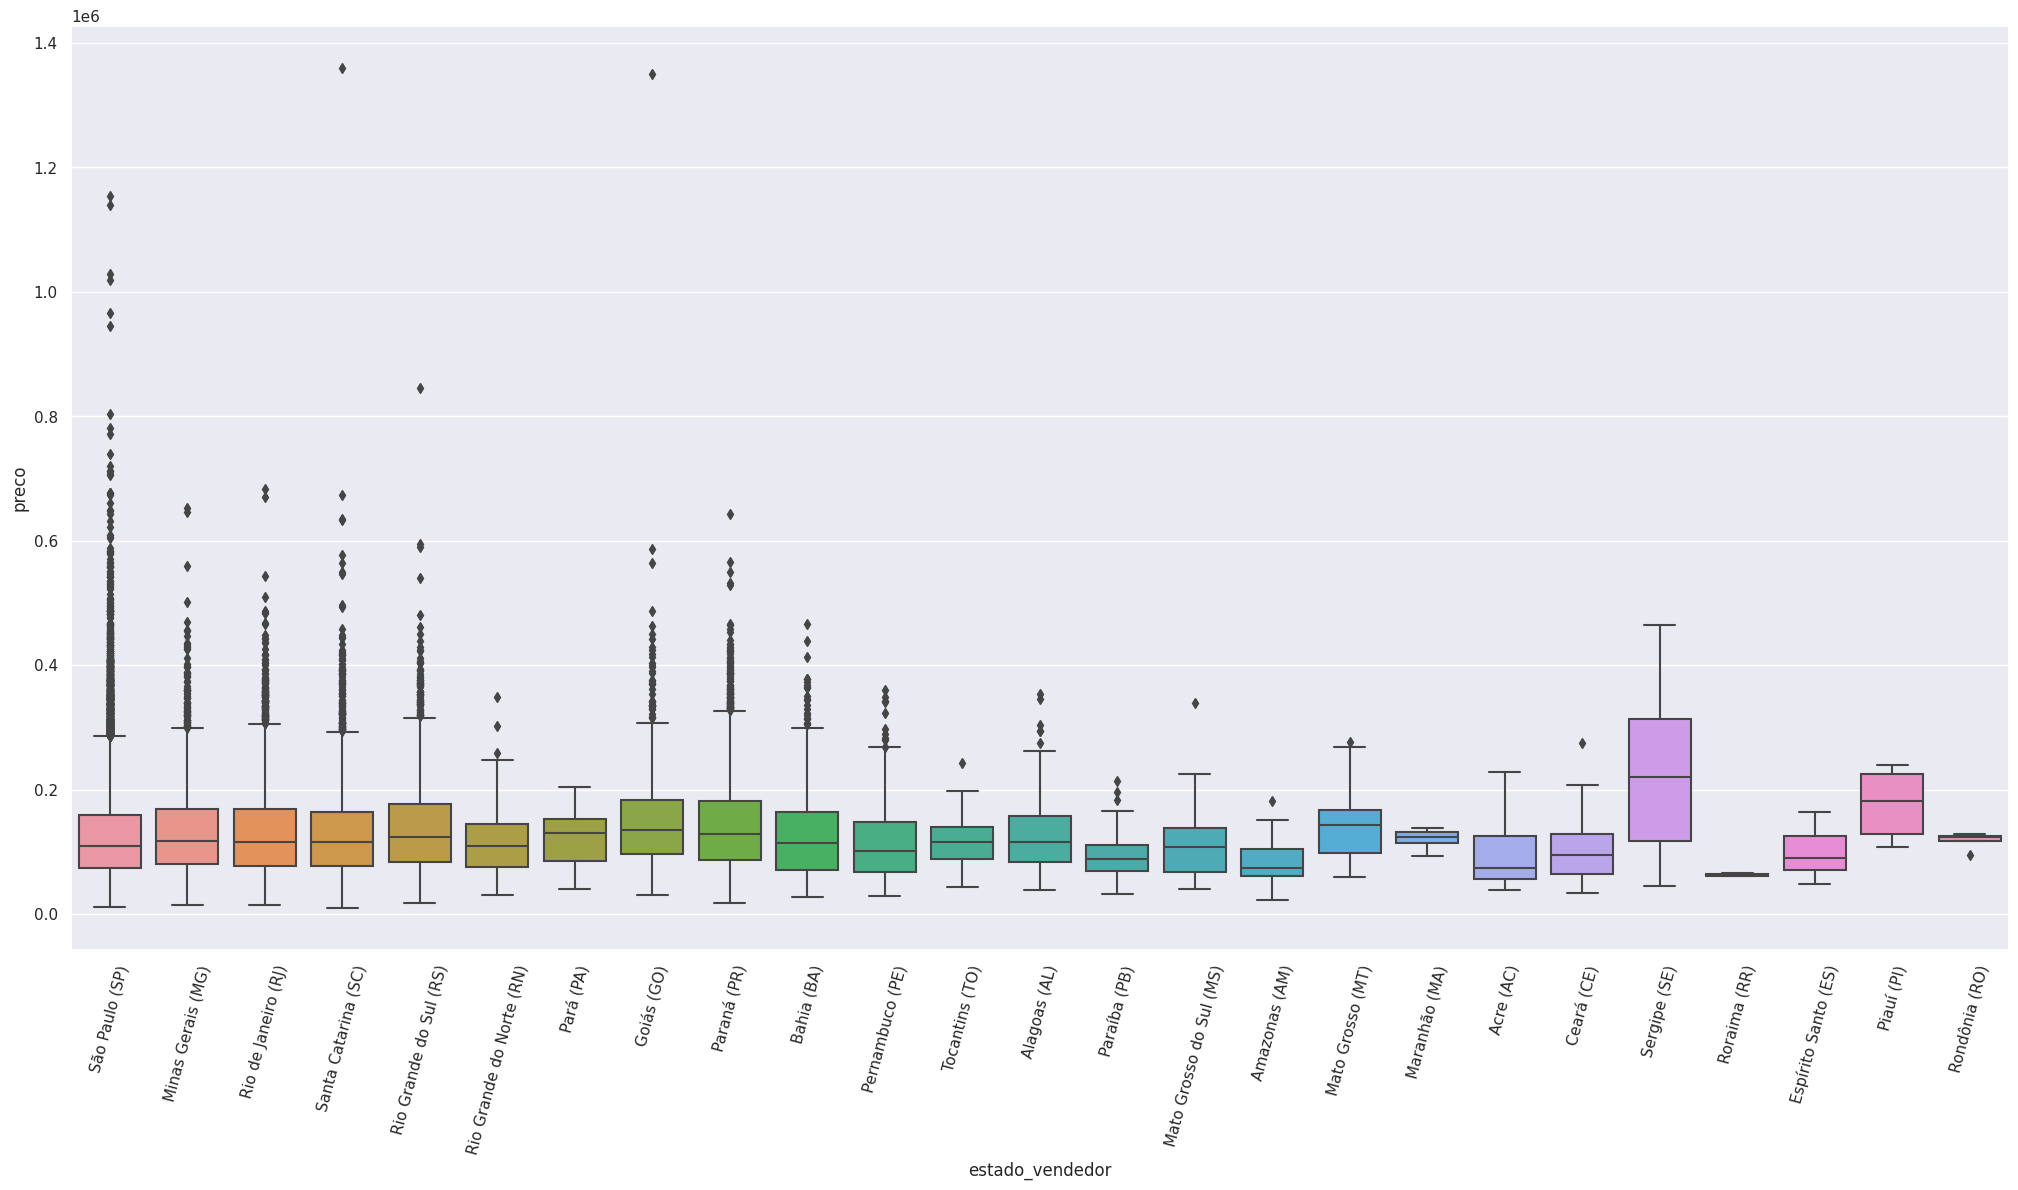

In [28]:
sns.boxplot(x='estado_vendedor', y='preco', data=df4)
plt.xticks(rotation=75);

#### Cilindradas

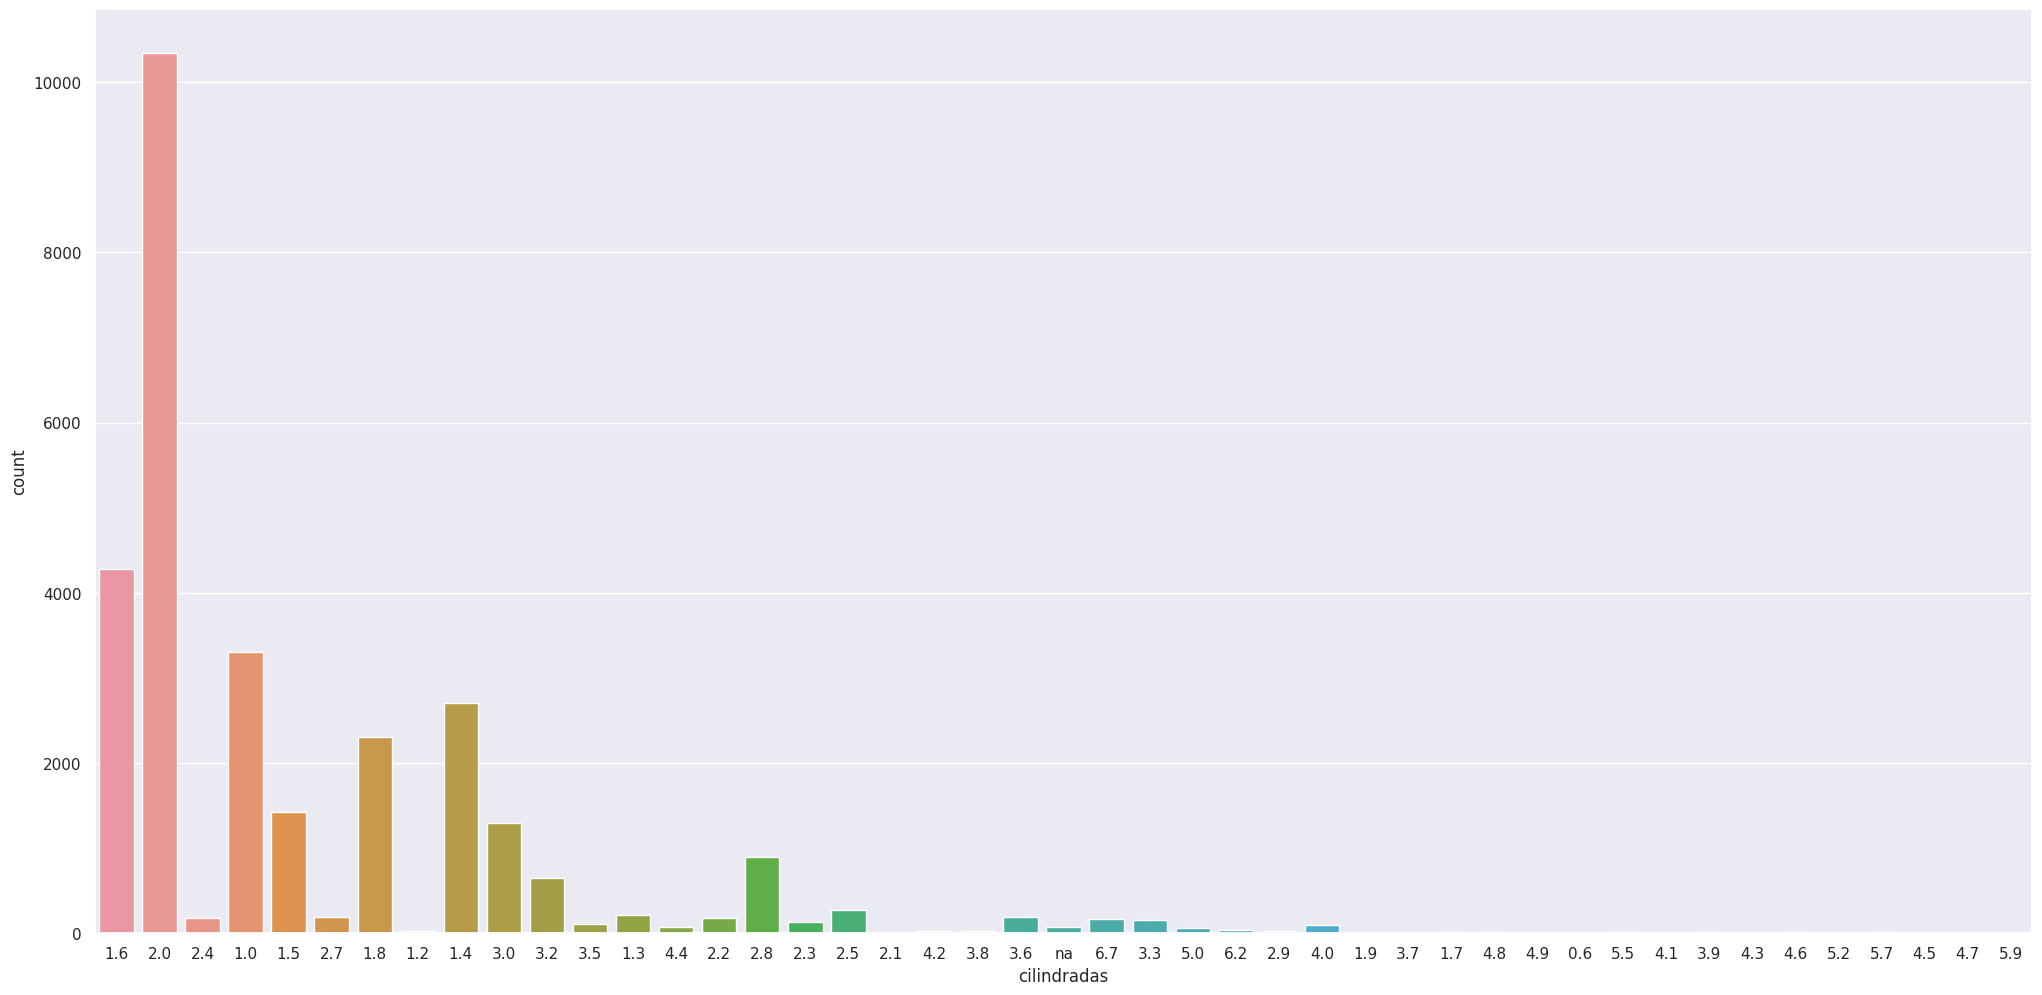

In [240]:
sns.countplot(x=df4['cilindradas']);

#### Combustível

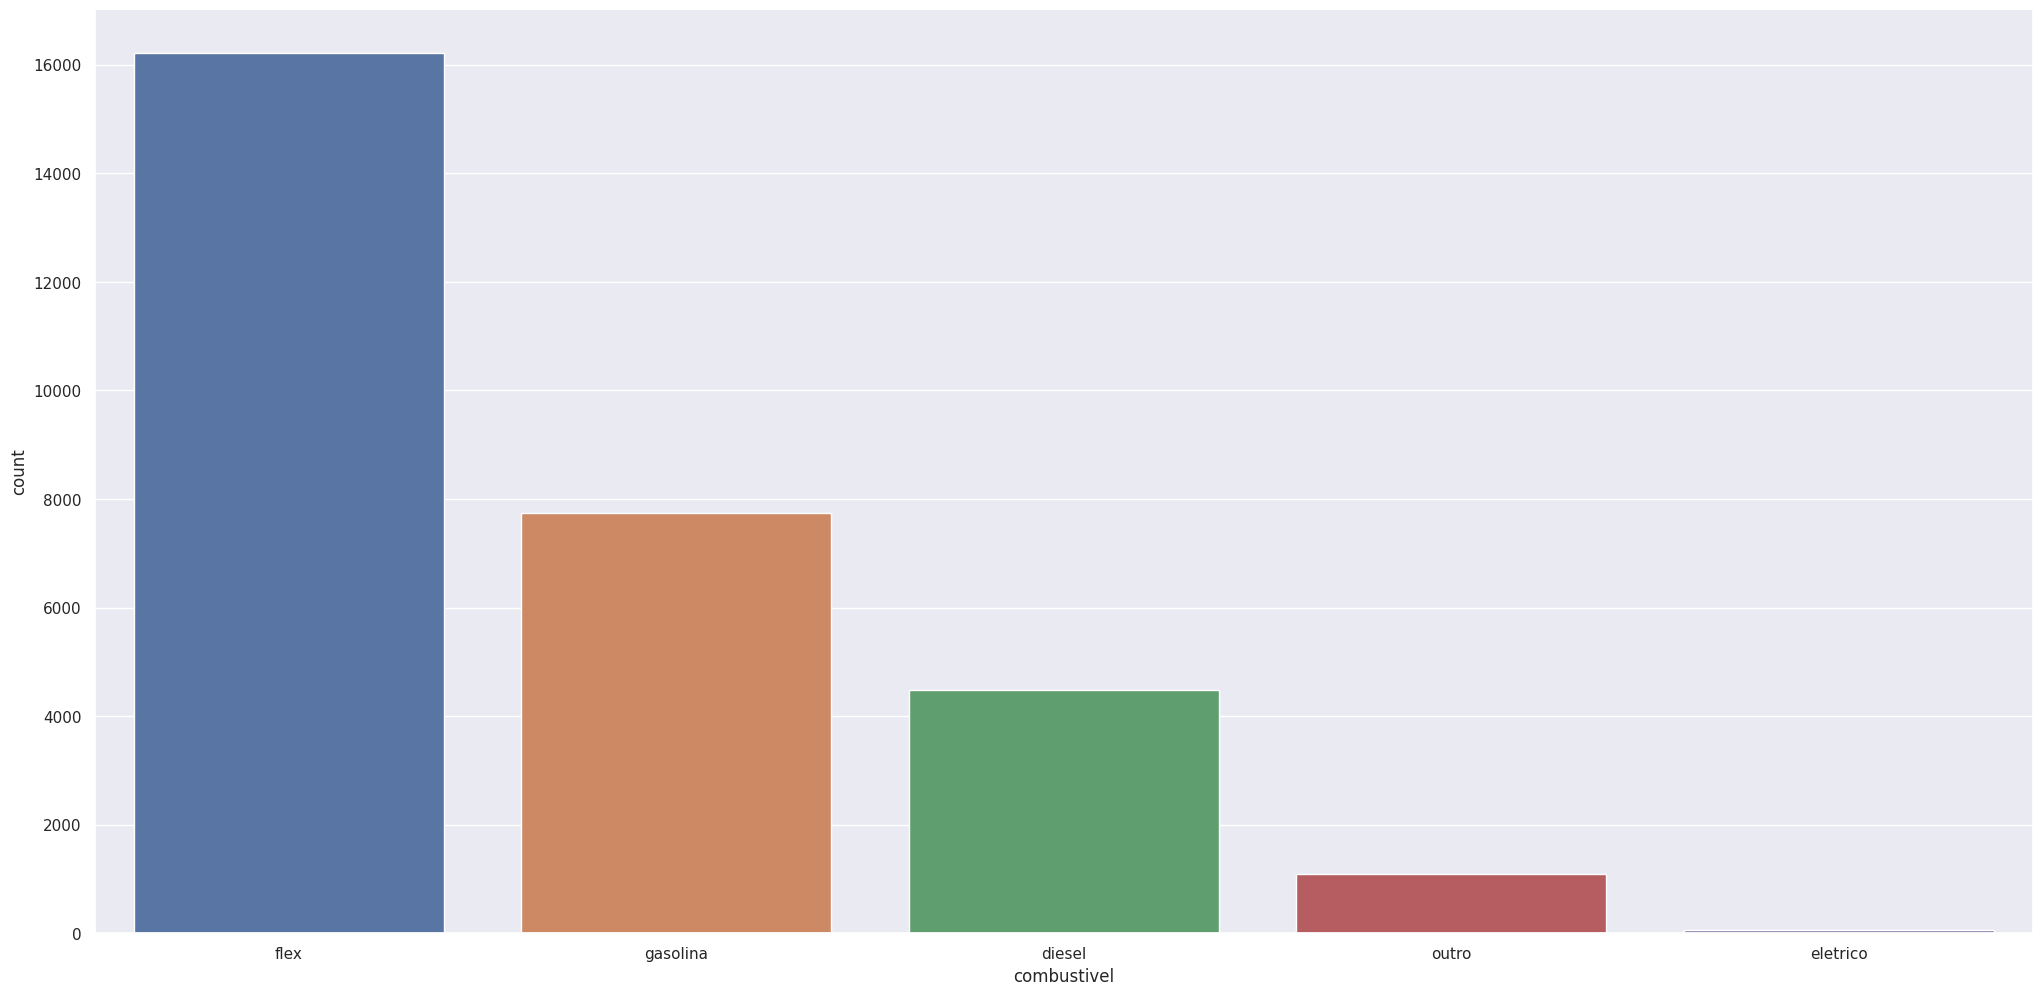

In [242]:
sns.countplot(x=df4['combustivel']);

#### Cambio, Tipo, Cor e Anunciante

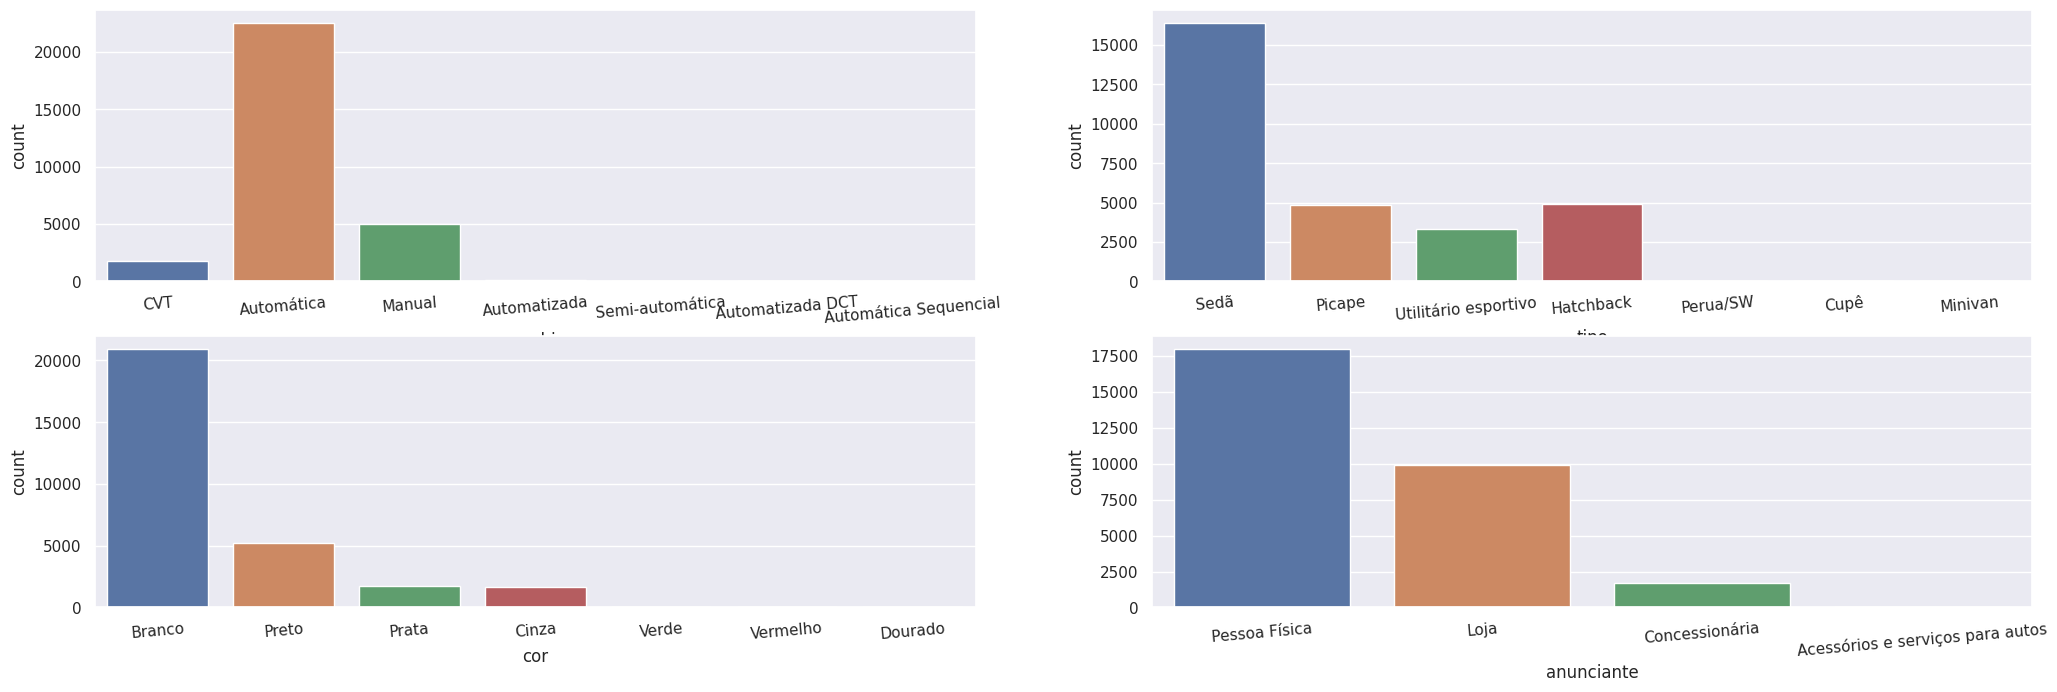

In [51]:
features = ['cambio', 'tipo', 'cor', 'anunciante']

for index, feature in enumerate(features, start=1):
    plt.subplot(3, 2, index)
    sns.countplot(x=feature, data=df4)
    plt.xticks(rotation=5);

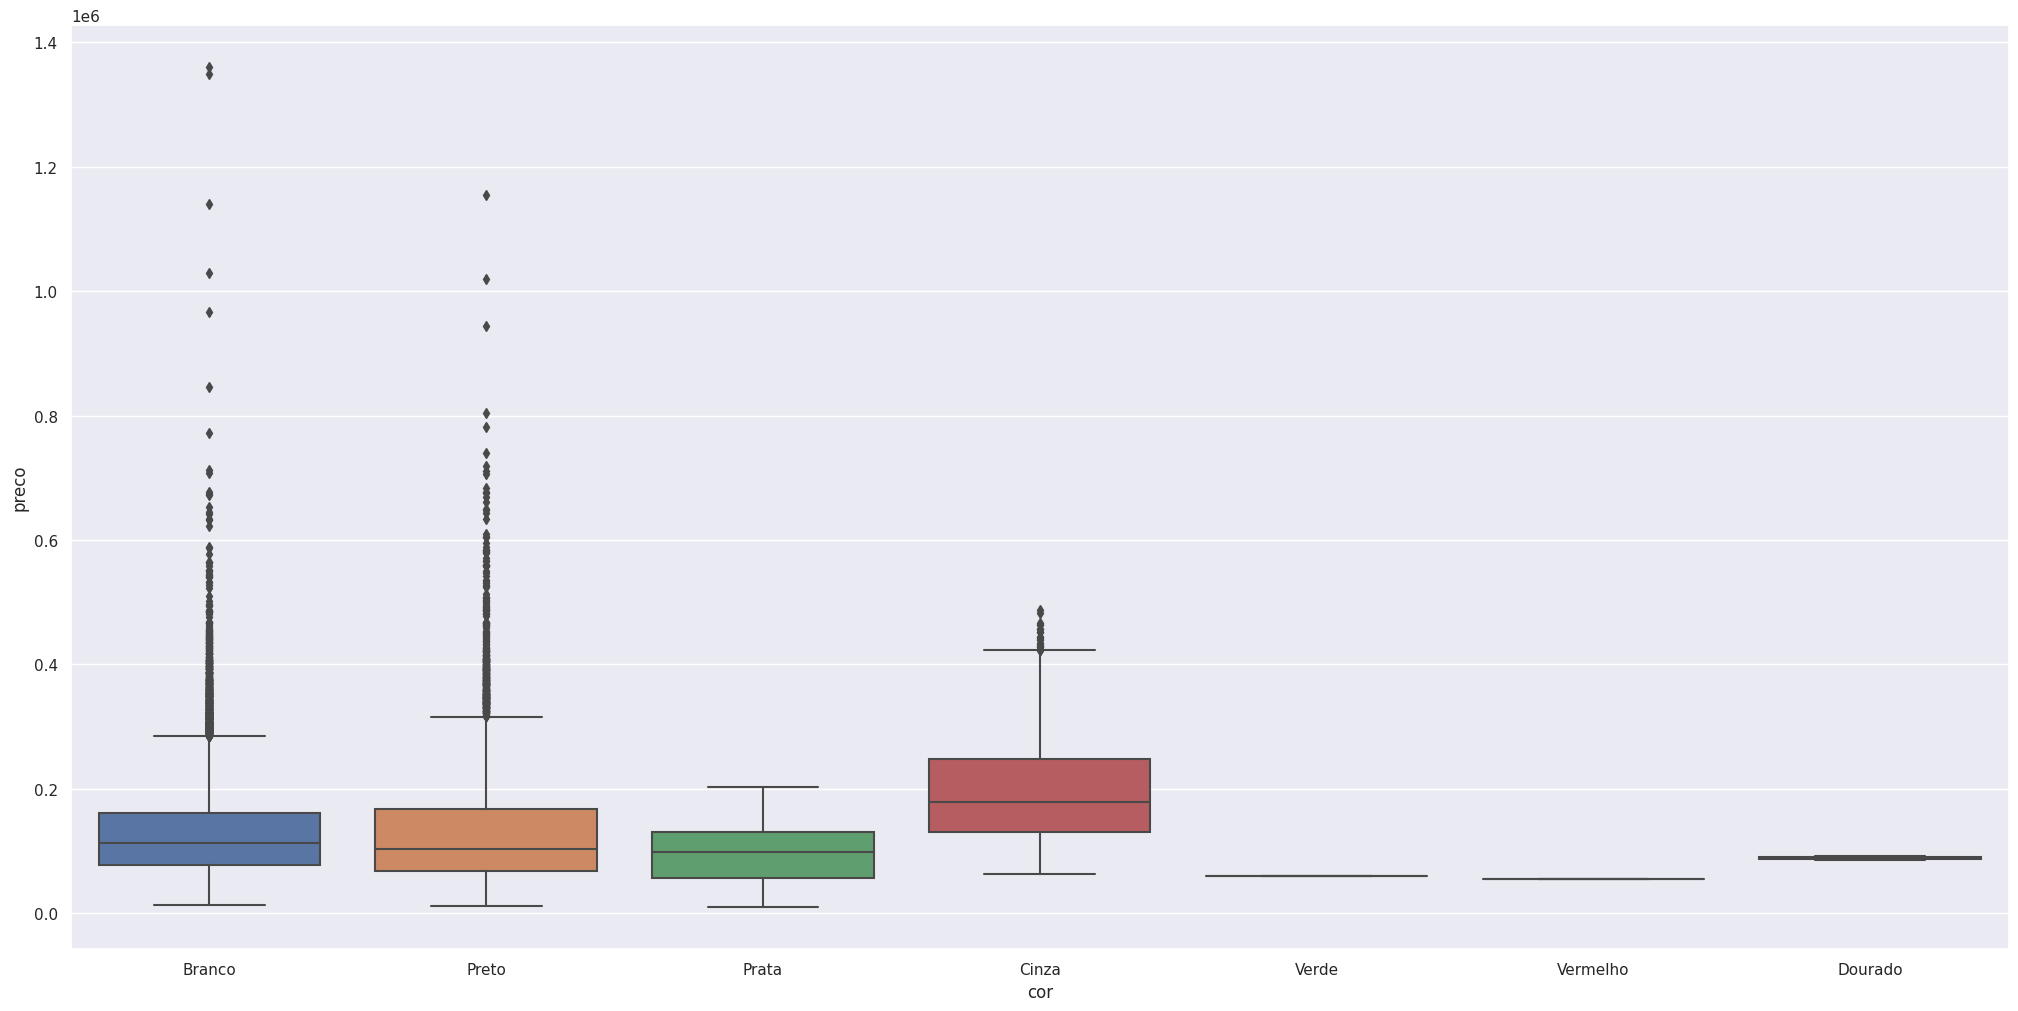

In [26]:
sns.boxplot(x='cor', y='preco', data=df4);

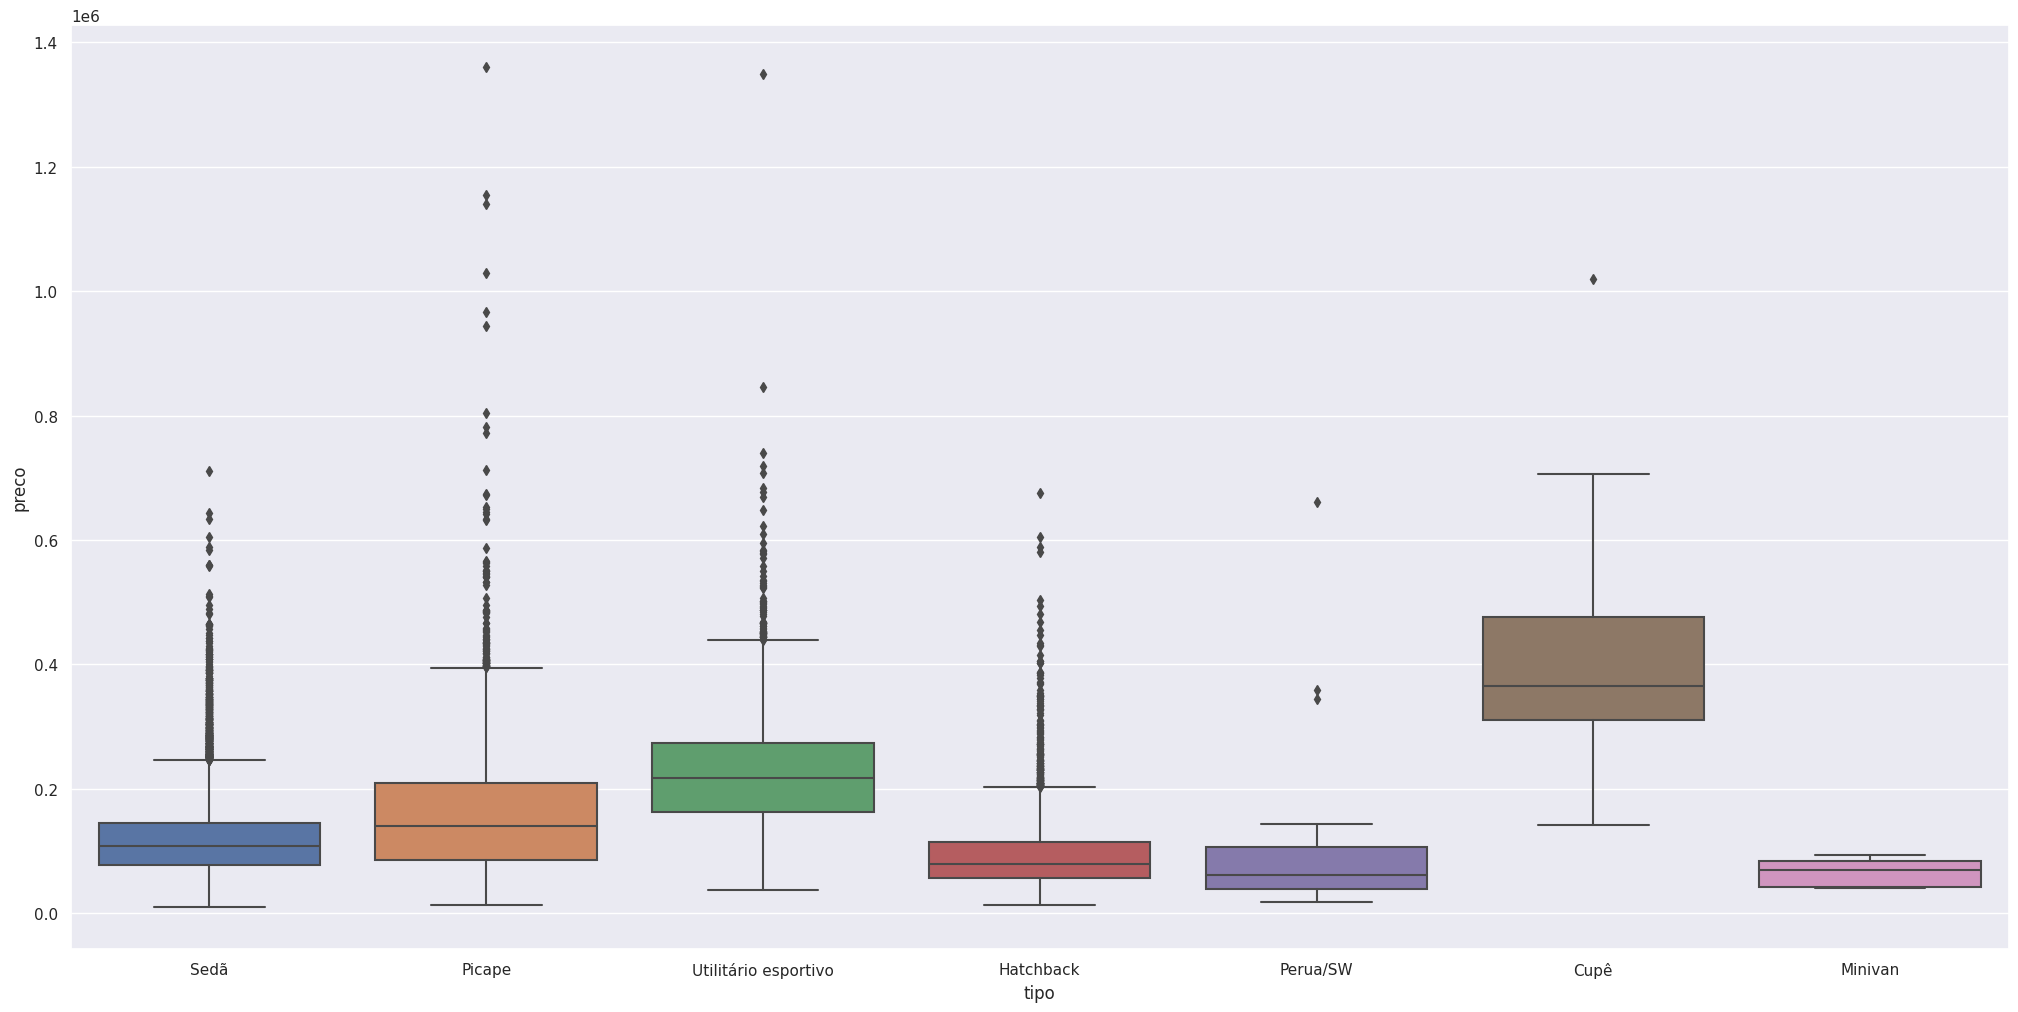

In [23]:
sns.boxplot(x='tipo', y='preco', data=df4);

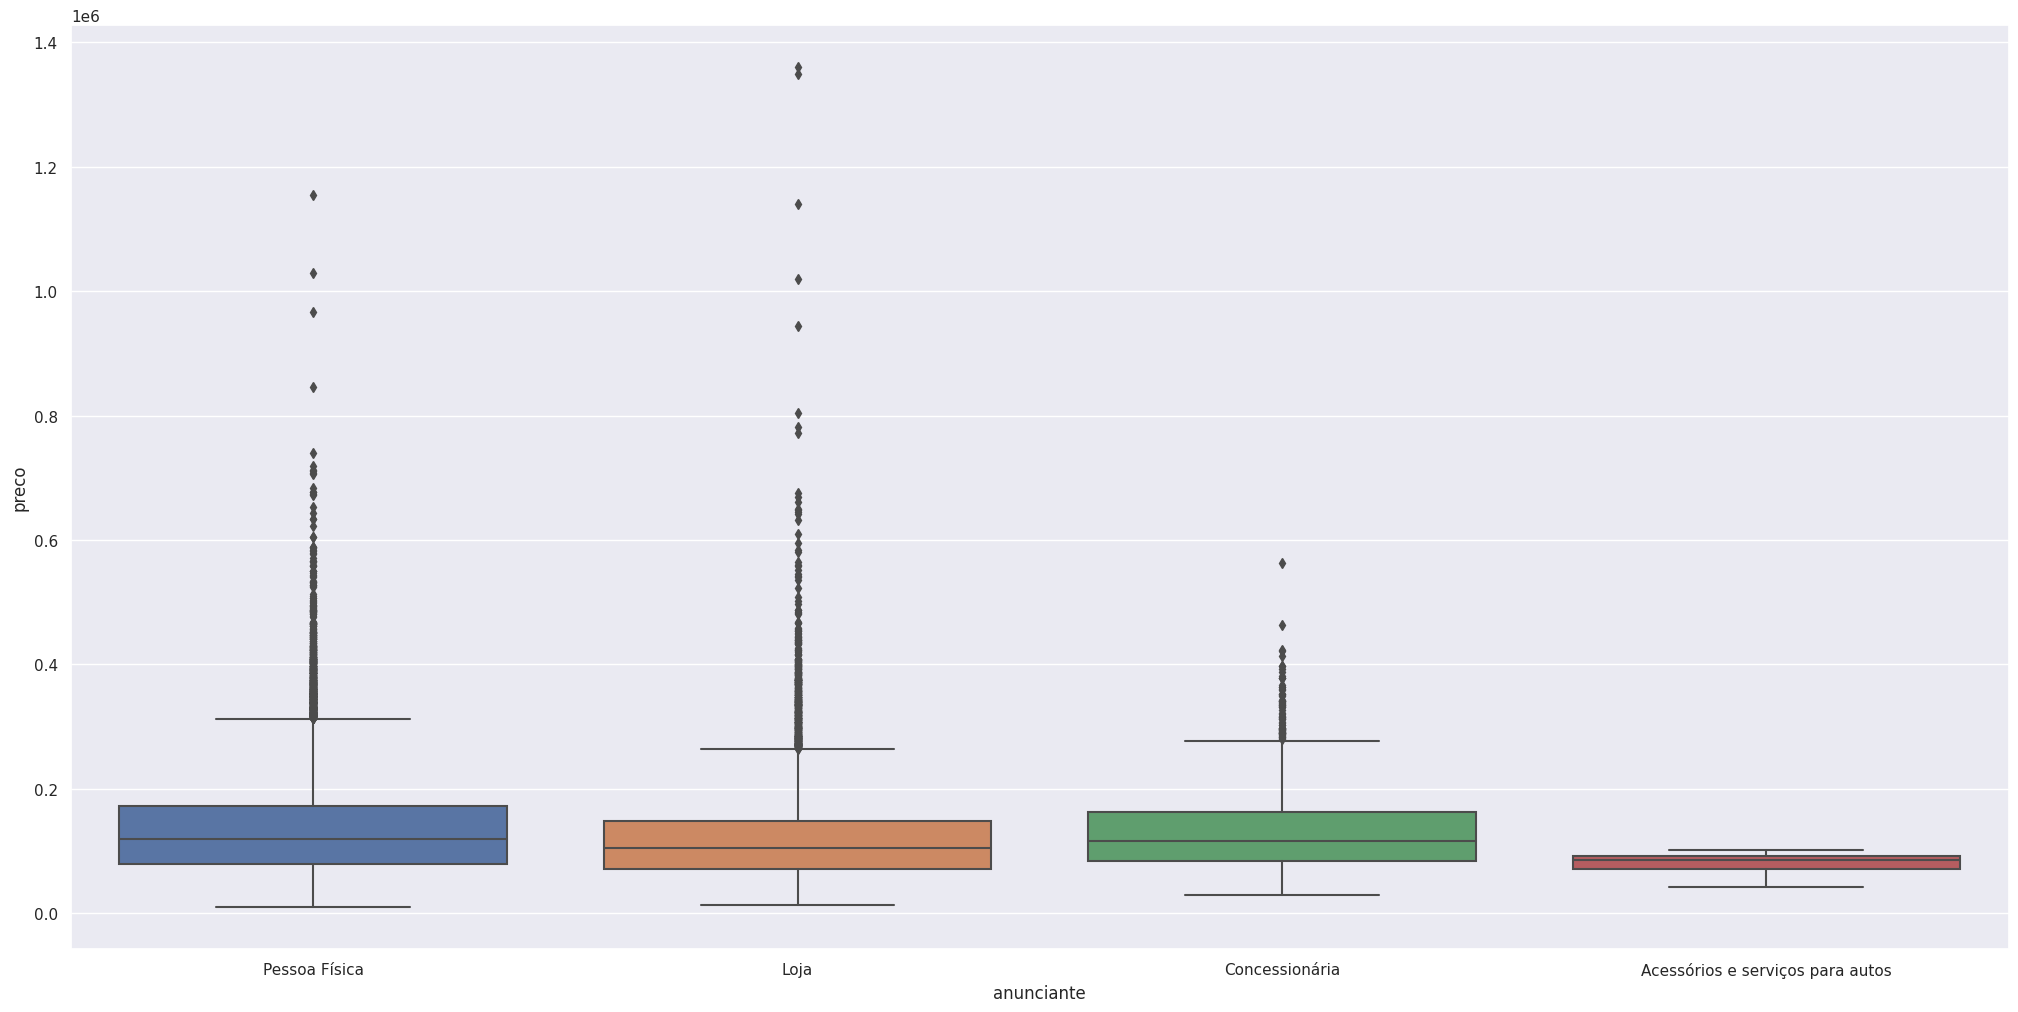

In [38]:
sns.boxplot(x='anunciante', y='preco', data=df4);

#### Variáveis Binárias

In [221]:
list_features = ['blindado', 'tipo_vendedor', 'delivery', 'troca', 'aceita_troca', 'unico_dono',
                 'revisoes_concessionaria', 'ipva', 'licenciado', 'garantia_fabrica', 'revisoes_agenda', 'turbo']

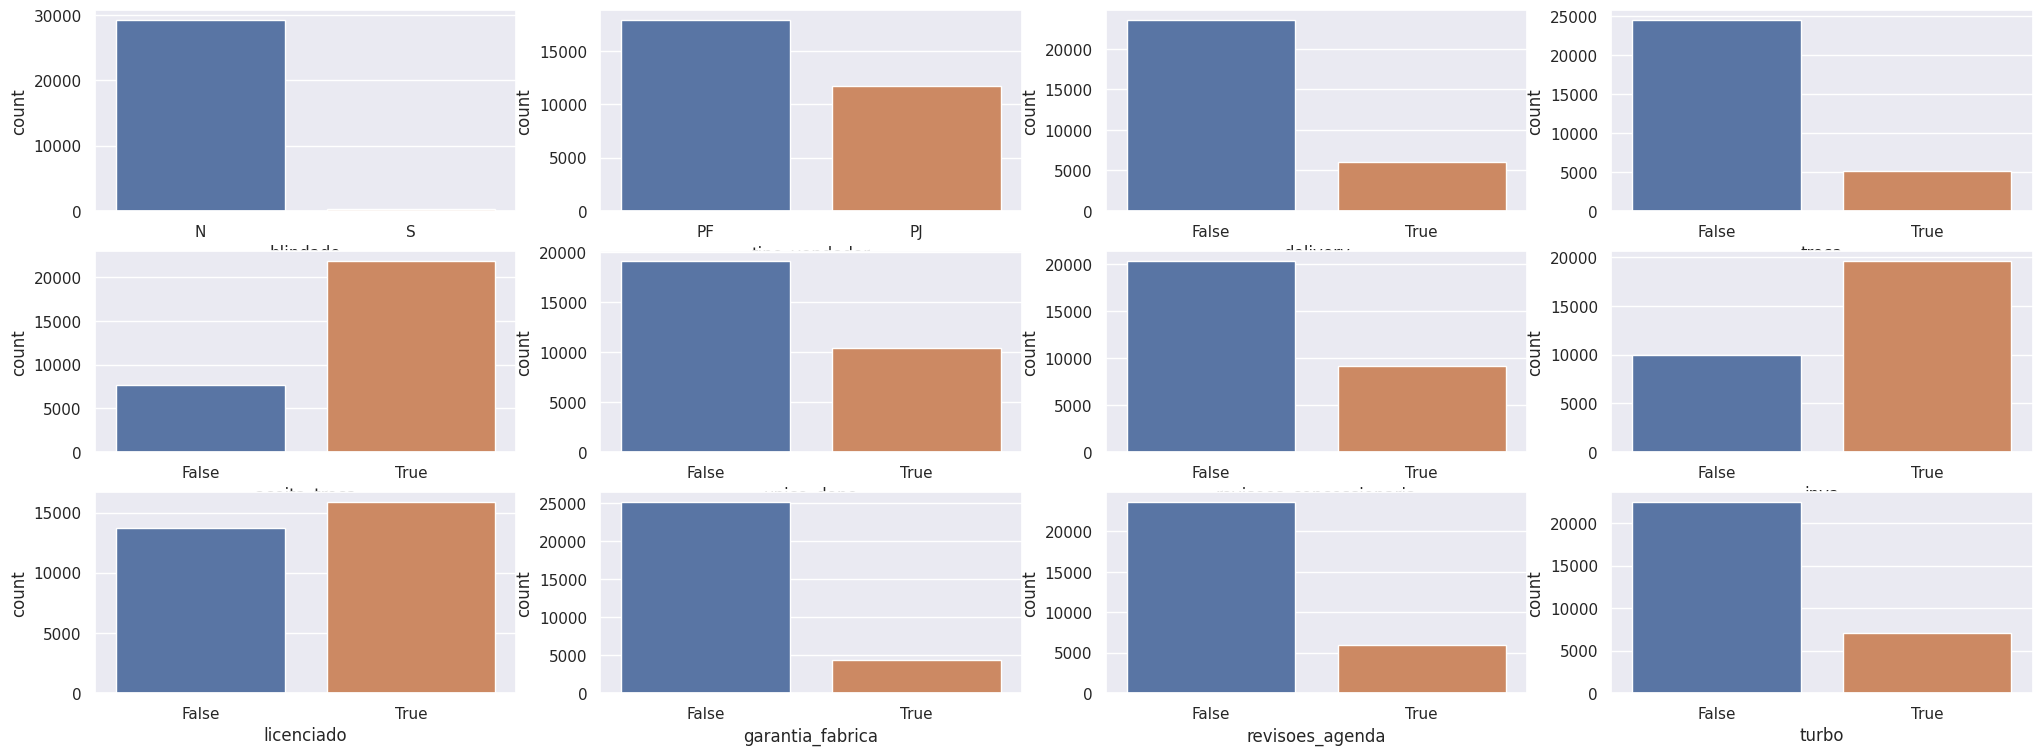

In [222]:
for index, feature in enumerate(list_features, start=1):
    plt.subplot(4, 4, index)
    sns.countplot(x=feature, data=df4)